In [53]:
# ----------- LIBRARY ---------------
"""
Library yang digunakan dalam kode ini adalah :
- pandas
- openpyxl

"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

In [54]:
# CLEANING UMUR > 100

In [55]:
df = pd.read_excel(r"Data\13222114.xlsx")
ukuran = df.shape
print(f"DataFrame memiliki {ukuran[0]} baris dan {ukuran[1]} kolom.")

DataFrame memiliki 282 baris dan 150 kolom.


In [56]:
df.drop(df[df['Usia'] > 100].index, inplace=True)
ukuran = df.shape

# Mengganti simbol '%' dan mengubah tipe data menjadi float
df['Durasi Penggunaan Internet per Hari (dalam Jam)'] = df['Durasi Penggunaan Internet per Hari (dalam Jam)'].str.replace('%', '').astype(float)

# Mengubah persentase menjadi bentuk numerik
df['Durasi Penggunaan Internet per Hari (dalam Jam)'] = df['Durasi Penggunaan Internet per Hari (dalam Jam)'] / 100


print(f"DataFrame setelah cleansing umur memiliki {ukuran[0]} baris dan {ukuran[1]} kolom.")
print(df[:5])

DataFrame setelah cleansing umur memiliki 279 baris dan 150 kolom.
  Jenis Kelamin  Usia Pendidikan Terakhir            Pekerjaan  \
0        Wanita    24                  S1                 BUMD   
1          Pria    32                  S1  Pelajar / Mahasiswa   
2          Pria    47                  S2      Karyawan Swasta   
3          Pria    51                  S1      Karyawan Swasta   
4          Pria    24                  S1  Pelajar / Mahasiswa   

    Penghasilan per Bulan  Domisili  \
0  Rp 5 juta – Rp 10 juta      RIAU   
1             < Rp 2 juta   Jakarta   
2            > Rp 10 juta   Jakarta   
3  Rp 5 juta – Rp 10 juta   Bandung   
4   Rp 2 juta – Rp 5 juta  Surabaya   

   Durasi Penggunaan Internet per Hari (dalam Jam) Aktivitas Online Meningkat  \
0                                             12.0                         Ya   
1                                              5.0                  Sama saja   
2                                              3.0        

In [57]:
# NOMER 1

ukuran = df.shape
print("1.a Berapa dimensi dataset?")
print(f"DataFrame memiliki {ukuran[0]} baris dan {ukuran[1]} kolom.")


1.a Berapa dimensi dataset?
DataFrame memiliki 279 baris dan 150 kolom.


In [58]:
print("1.b Jumlah missing value per kolom?")
for col in df.columns:
    missing = df[col].isnull().sum()
    print(f"Jumlah missing value pada kolom '{col}': {missing}")

1.b Jumlah missing value per kolom?
Jumlah missing value pada kolom 'Jenis Kelamin': 0
Jumlah missing value pada kolom 'Usia': 0
Jumlah missing value pada kolom 'Pendidikan Terakhir': 0
Jumlah missing value pada kolom 'Pekerjaan': 0
Jumlah missing value pada kolom 'Penghasilan per Bulan': 0
Jumlah missing value pada kolom 'Domisili': 0
Jumlah missing value pada kolom 'Durasi Penggunaan Internet per Hari (dalam Jam)': 84
Jumlah missing value pada kolom 'Aktivitas Online Meningkat': 0
Jumlah missing value pada kolom 'Aktivitas yang Meningkat dalam 3 Bulan Terakhir': 95
Jumlah missing value pada kolom 'layanan_aktif_1': 43
Jumlah missing value pada kolom 'layanan_aktif_2': 133
Jumlah missing value pada kolom 'layanan_aktif_3': 256
Jumlah missing value pada kolom 'layanan_aktif_4': 224
Jumlah missing value pada kolom 'layanan_aktif_5': 264
Jumlah missing value pada kolom 'layanan_aktif_6': 268
Jumlah missing value pada kolom 'bank_1': 214
Jumlah missing value pada kolom 'bank_2': 212
Jumla

In [59]:
for col in df.columns:
    missing = df[col].isnull().sum()
    print(f"Jumlah missing value pada kolom '{col}': {missing}")


Jumlah missing value pada kolom 'Jenis Kelamin': 0
Jumlah missing value pada kolom 'Usia': 0
Jumlah missing value pada kolom 'Pendidikan Terakhir': 0
Jumlah missing value pada kolom 'Pekerjaan': 0
Jumlah missing value pada kolom 'Penghasilan per Bulan': 0
Jumlah missing value pada kolom 'Domisili': 0
Jumlah missing value pada kolom 'Durasi Penggunaan Internet per Hari (dalam Jam)': 84
Jumlah missing value pada kolom 'Aktivitas Online Meningkat': 0
Jumlah missing value pada kolom 'Aktivitas yang Meningkat dalam 3 Bulan Terakhir': 95
Jumlah missing value pada kolom 'layanan_aktif_1': 43
Jumlah missing value pada kolom 'layanan_aktif_2': 133
Jumlah missing value pada kolom 'layanan_aktif_3': 256
Jumlah missing value pada kolom 'layanan_aktif_4': 224
Jumlah missing value pada kolom 'layanan_aktif_5': 264
Jumlah missing value pada kolom 'layanan_aktif_6': 268
Jumlah missing value pada kolom 'bank_1': 214
Jumlah missing value pada kolom 'bank_2': 212
Jumlah missing value pada kolom 'bank_3':

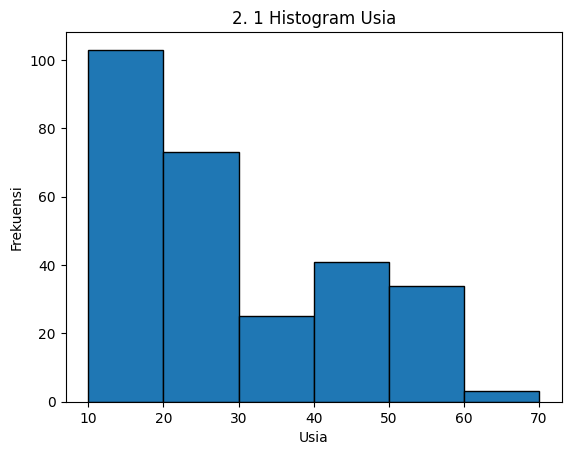

In [60]:
usia = df['Usia']

# Membuat rentang usia
bins = np.arange(10, usia.max() + 10, 10)

# Membuat histogram
plt.hist(usia, bins=bins, edgecolor='black')

plt.title('2. 1 Histogram Usia')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')

plt.show()

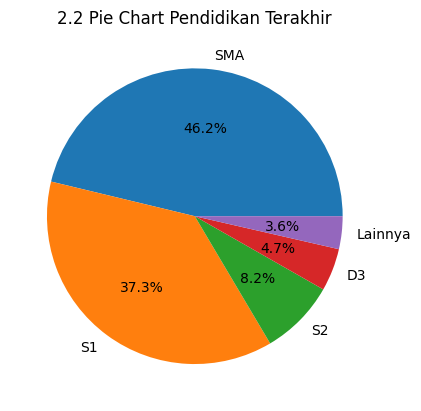

Nilai yang terkandung dalam 'Lainnya':
S3
SMP
D4


In [61]:
# Menghitung jumlah setiap nilai unik dan konversi ke persentase
counts = df['Pendidikan Terakhir'].value_counts(normalize=True) * 100

# Menyimpan nilai dengan presentase kurang dari 4% dalam variabel lain
nilai_lainnya = counts[counts < 4]

# Menggabungkan nilai dengan presentase kurang dari 4%
counts = counts[counts >= 4]
counts['Lainnya'] = nilai_lainnya.sum()

# Membuat pie chart
counts.plot(kind='pie', autopct='%1.1f%%')

plt.title('2.2 Pie Chart Pendidikan Terakhir')
plt.ylabel('')  # Menghapus label sumbu y

plt.show()

# Mencetak nilai yang terkandung dalam 'Lainnya'
print("Nilai yang terkandung dalam 'Lainnya':")
for nilai in nilai_lainnya.index:
    print(nilai)


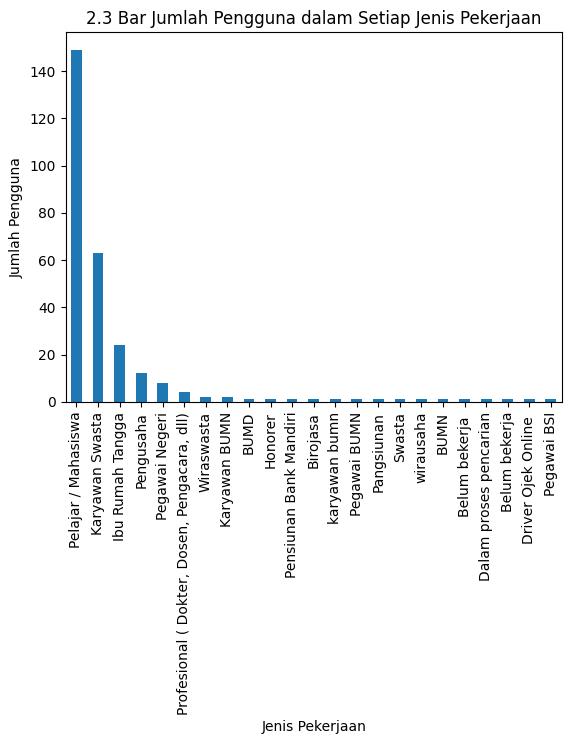

In [62]:
# Misalkan 'df' adalah DataFrame Anda dan 'Pekerjaan' adalah kolom yang berisi data pekerjaan
pekerjaan = df['Pekerjaan']

# Menghitung jumlah setiap jenis pekerjaan
counts = pekerjaan.value_counts()

# Membuat bar chart
counts.plot(kind='bar')

plt.title('2.3 Bar Jumlah Pengguna dalam Setiap Jenis Pekerjaan')
plt.xlabel('Jenis Pekerjaan')
plt.ylabel('Jumlah Pengguna')

plt.show()

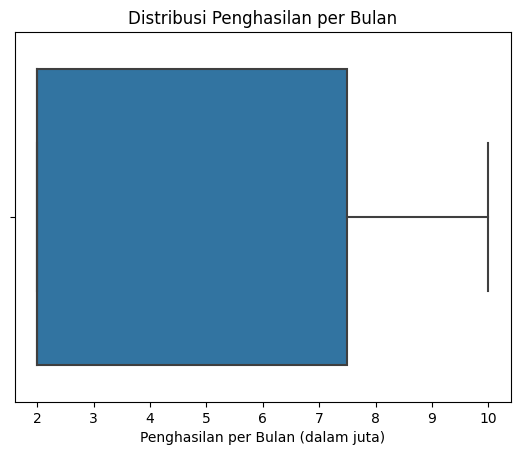

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengganti simbol mata uang dan spasi
penghasilan_per_bulan = df['Penghasilan per Bulan'].str.replace('Rp ', '').str.replace(' juta', '')

# Mengubah rentang penghasilan menjadi rata-rata
def rata_rata(rentang):
    if rentang.startswith('<'):
        return float(rentang.replace('< ', ''))
    elif rentang.startswith('>'):
        return float(rentang.replace('> ', ''))
    else:
        batas_bawah, batas_atas = rentang.split(' – ')
        return (float(batas_bawah) + float(batas_atas)) / 2

penghasilan_per_bulan = penghasilan_per_bulan.apply(rata_rata)

# Membuat box plot
sns.boxplot(x=penghasilan_per_bulan, orient='h')

plt.title('Distribusi Penghasilan per Bulan')
plt.xlabel('Penghasilan per Bulan (dalam juta)')

plt.show()


In [64]:
print(df.columns)

Index(['Jenis Kelamin', 'Usia', 'Pendidikan Terakhir', 'Pekerjaan',
       'Penghasilan per Bulan', 'Domisili',
       'Durasi Penggunaan Internet per Hari (dalam Jam)',
       'Aktivitas Online Meningkat',
       'Aktivitas yang Meningkat dalam 3 Bulan Terakhir', 'layanan_aktif_1',
       ...
       'cara_pembayaran_belanja_online_5', 'cara_pembayaran_belanja_online_6',
       'cara_pembayaran_belanja_online_7', 'cara_pembayaran_belanja_online_8',
       'keluhan_belanja_online_1', 'keluhan_belanja_online_2',
       'keluhan_belanja_online_3', 'keluhan_belanja_online_4',
       'keluhan_belanja_online_5', 'keluhan_belanja_online_6'],
      dtype='object', length=150)


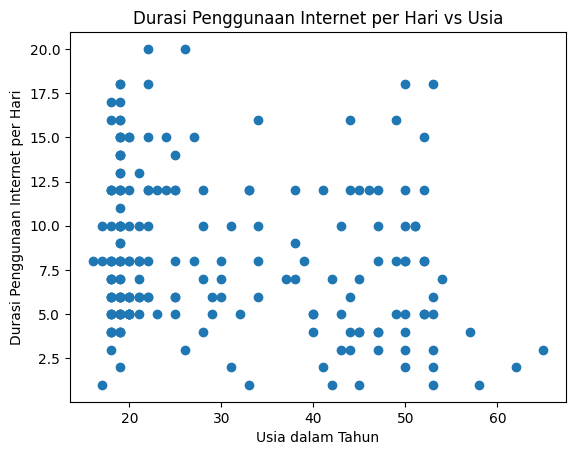

In [65]:
# Misalkan 'df' adalah DataFrame Anda dan 'Durasi Penggunaan Internet per Hari' dan 'Penghasilan per Bulan' adalah kolom yang berisi data yang relevan
internet = df['Durasi Penggunaan Internet per Hari (dalam Jam)']
Usia = df['Usia']

# Membuat scatter plot
plt.scatter(Usia, internet)

plt.title('Durasi Penggunaan Internet per Hari vs Usia')
plt.xlabel('Usia dalam Tahun')
plt.ylabel('Durasi Penggunaan Internet per Hari')

plt.show()

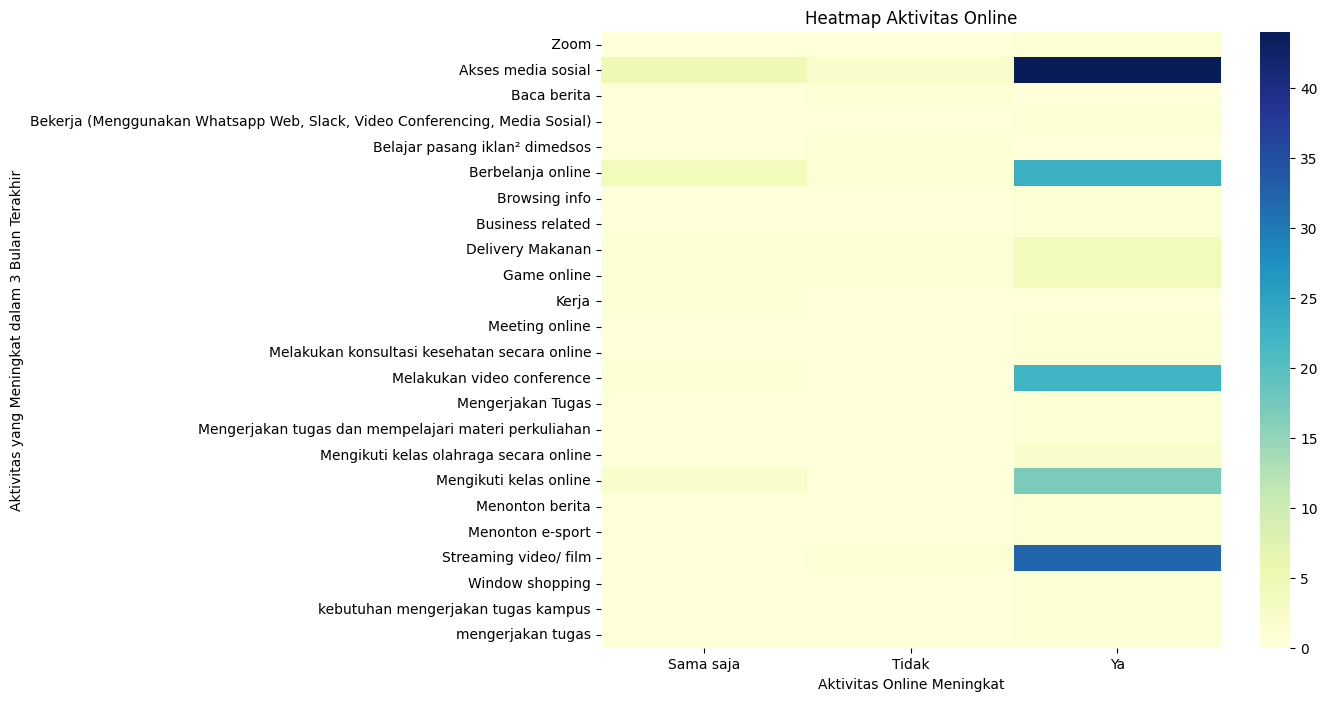

In [66]:

# Menghitung frekuensi setiap kombinasi aktivitas online
data = pd.crosstab(df['Aktivitas yang Meningkat dalam 3 Bulan Terakhir'], df['Aktivitas Online Meningkat'])

# Membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data, cmap='YlGnBu')

plt.title('Heatmap Aktivitas Online')
plt.show()


In [67]:
# Menampilkan data unik di kolom "pekerjaan"
pekerjaan_unik = df['47. Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut? [tiket bioskop tiket wisata]'].unique()

print("Data unik di kolom 'pekerjaan':")
for pekerjaan in pekerjaan_unik:
    print(pekerjaan)

Data unik di kolom 'pekerjaan':
Rp 5 juta – Rp 10 juta
< Rp 2 juta
> Rp 10 juta
Rp 2 juta – Rp 5 juta


In [68]:
print(df[:5])

  Jenis Kelamin  Usia Pendidikan Terakhir            Pekerjaan  \
0        Wanita    24                  S1                 BUMD   
1          Pria    32                  S1  Pelajar / Mahasiswa   
2          Pria    47                  S2      Karyawan Swasta   
3          Pria    51                  S1      Karyawan Swasta   
4          Pria    24                  S1  Pelajar / Mahasiswa   

    Penghasilan per Bulan  Domisili  \
0  Rp 5 juta – Rp 10 juta      RIAU   
1             < Rp 2 juta   Jakarta   
2            > Rp 10 juta   Jakarta   
3  Rp 5 juta – Rp 10 juta   Bandung   
4   Rp 2 juta – Rp 5 juta  Surabaya   

   Durasi Penggunaan Internet per Hari (dalam Jam) Aktivitas Online Meningkat  \
0                                             12.0                         Ya   
1                                              5.0                  Sama saja   
2                                              3.0                         Ya   
3                                           

In [69]:
# Menghitung nilai unik dan persentasenya di kolom "Pekerjaan"
nilai_unik = df['Aktivitas Online Meningkat'].value_counts()
persentase = nilai_unik / len(df) * 100

# rata_rata_usia = df['Durasi Penggunaan Internet per Hari (dalam Jam)'].mean()


# # Menampilkan hasil
# print("Rata-rata nilai di kolom 'Usia':", rata_rata_usia)

#Menampilkan hasil
print("Jumlah kemunculan nilai unik di kolom 'Pekerjaan':")
print(nilai_unik)

print("\nPersentase kemunculan nilai unik di kolom 'Pekerjaan':")
print(persentase)

Jumlah kemunculan nilai unik di kolom 'Pekerjaan':
Aktivitas Online Meningkat
Ya           161
Sama saja     85
Tidak         33
Name: count, dtype: int64

Persentase kemunculan nilai unik di kolom 'Pekerjaan':
Aktivitas Online Meningkat
Ya           57.706093
Sama saja    30.465950
Tidak        11.827957
Name: count, dtype: float64


Confidence interval for Pendidikan Terakhir=S1: (0.32, 0.43)
Confidence interval for Pendidikan Terakhir=S2: (0.05, 0.11)
Confidence interval for Pendidikan Terakhir=D3: (0.02, 0.07)
Confidence interval for Pendidikan Terakhir=SMA: (0.40, 0.52)
Confidence interval for Pendidikan Terakhir=D4: (-0.00, 0.02)
Confidence interval for Pendidikan Terakhir=SMP: (-0.00, 0.02)
Confidence interval for Pendidikan Terakhir=S3: (0.00, 0.03)


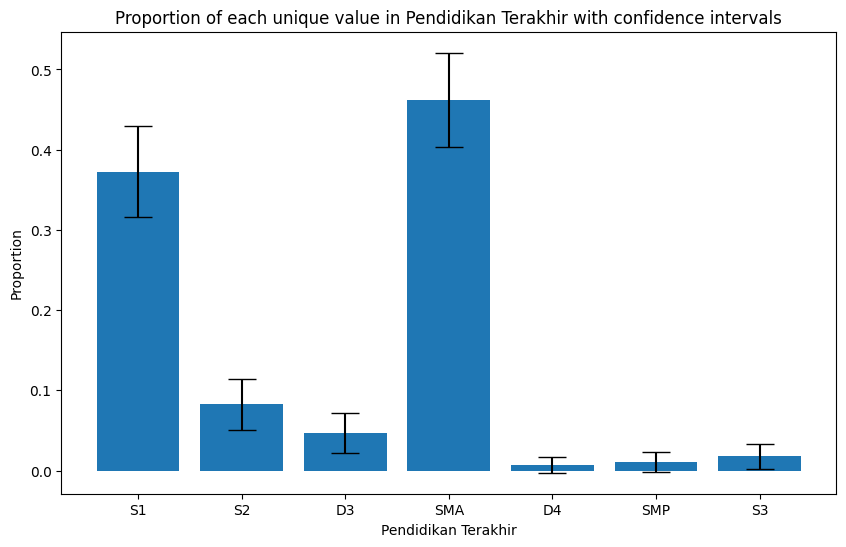

Confidence interval for Penghasilan per Bulan=Rp 5 juta – Rp 10 juta: (0.08, 0.15)
Confidence interval for Penghasilan per Bulan=< Rp 2 juta: (0.48, 0.59)
Confidence interval for Penghasilan per Bulan=> Rp 10 juta: (0.15, 0.25)
Confidence interval for Penghasilan per Bulan=Rp 2 juta – Rp 5 juta: (0.11, 0.19)


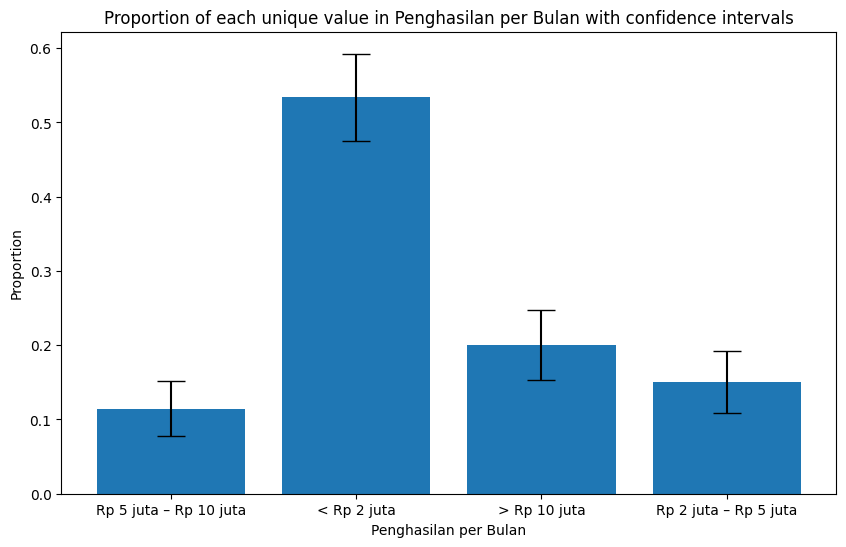

Confidence interval for Aktivitas Online Meningkat=Ya: (0.52, 0.64)
Confidence interval for Aktivitas Online Meningkat=Sama saja: (0.25, 0.36)
Confidence interval for Aktivitas Online Meningkat=Tidak: (0.08, 0.16)


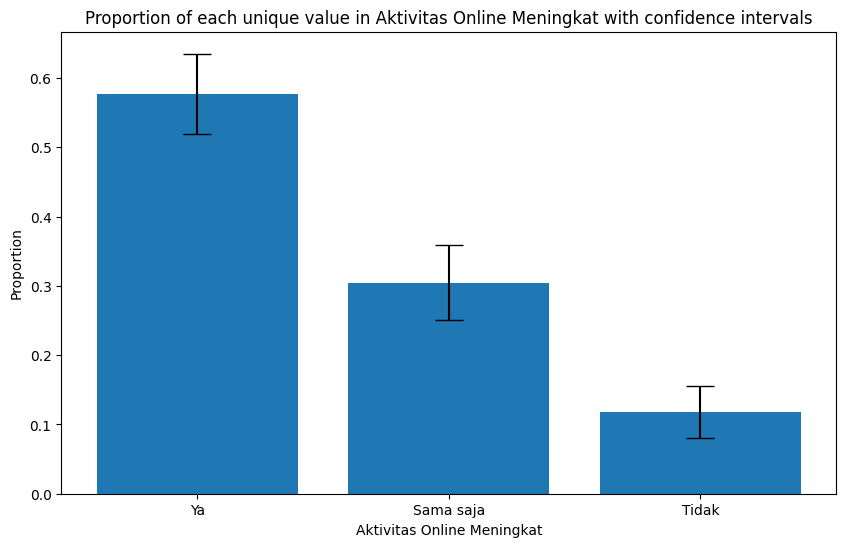

In [70]:
import matplotlib.pyplot as plt

# Fungsi untuk menghitung interval kepercayaan
def compute_confidence_interval(data, confidence=0.95):
    n = len(data)
    prop = np.mean(data)
    std_error = np.std(data) / np.sqrt(n)
    z = stats.norm.ppf(1 - (1 - confidence) / 2)
    moe = z * std_error
    return prop - moe, prop + moe

# Menghitung interval kepercayaan untuk setiap nilai unik dalam setiap variabel
for var in ['Pendidikan Terakhir', 'Penghasilan per Bulan', 'Aktivitas Online Meningkat']:
    unique_values = df[var].unique()
    proportions = []
    ci_lows = []
    ci_highs = []
    for value in unique_values:
        values = df[var].apply(lambda v: 1 if v == value else 0)
        prop = np.mean(values)
        ci_low, ci_high = compute_confidence_interval(values)
        proportions.append(prop)
        ci_lows.append(ci_low)
        ci_highs.append(ci_high)
        print(f'Confidence interval for {var}={value}: ({ci_low:.2f}, {ci_high:.2f})')

    # Membuat grafik batang
    plt.figure(figsize=(10, 6))
    plt.bar(unique_values, proportions, yerr=[np.array(proportions)-np.array(ci_lows), np.array(ci_highs)-np.array(proportions)], capsize=10)
    plt.xlabel(var)
    plt.ylabel('Proportion')
    plt.title(f'Proportion of each unique value in {var} with confidence intervals')
    plt.show()


In [72]:
import numpy as np
import statsmodels.api as sm

# Daftar variabel
variables = ['Jenis Kelamin', 'Pendidikan Terakhir', 'Pekerjaan']

# Nilai proporsi hipotesis nol
h0_prop = 0.5  # misalnya kita menguji apakah proporsi adalah 0.5

# Tingkat signifikansi
alpha = 0.05

for var in variables:
    unique_values = df[var].unique()
    for unique_value in unique_values:
        # Hitung proporsi sampel dan ukuran sampel
        sample_success = np.sum(df[var] == unique_value)
        n = len(df[var])

        # Cek apakah ada variasi dalam data
        if sample_success == 0 or sample_success == n:
            print(f"Untuk variabel {var} dengan nilai {unique_value}, semua nilai sama. Tidak dapat melakukan Z test.")
            continue

        # Hitung z-statistik dan p-value
        z_stat, p_value = sm.stats.proportions_ztest(sample_success, n, h0_prop)

        # Keputusan uji hipotesis
        if p_value < alpha:
            print(f"Untuk variabel {var} dengan nilai {unique_value}, kita menolak H0. Proporsi tidak sama dengan {h0_prop}.")
        else:
            print(f"Untuk variabel {var} dengan nilai {unique_value}, kita gagal menolak H0. Proporsi sama dengan {h0_prop}.")


Untuk variabel Jenis Kelamin dengan nilai Wanita, kita menolak H0. Proporsi tidak sama dengan 0.5.
Untuk variabel Jenis Kelamin dengan nilai Pria, kita menolak H0. Proporsi tidak sama dengan 0.5.
Untuk variabel Pendidikan Terakhir dengan nilai S1, kita menolak H0. Proporsi tidak sama dengan 0.5.
Untuk variabel Pendidikan Terakhir dengan nilai S2, kita menolak H0. Proporsi tidak sama dengan 0.5.
Untuk variabel Pendidikan Terakhir dengan nilai D3, kita menolak H0. Proporsi tidak sama dengan 0.5.
Untuk variabel Pendidikan Terakhir dengan nilai SMA, kita gagal menolak H0. Proporsi sama dengan 0.5.
Untuk variabel Pendidikan Terakhir dengan nilai D4, kita menolak H0. Proporsi tidak sama dengan 0.5.
Untuk variabel Pendidikan Terakhir dengan nilai SMP, kita menolak H0. Proporsi tidak sama dengan 0.5.
Untuk variabel Pendidikan Terakhir dengan nilai S3, kita menolak H0. Proporsi tidak sama dengan 0.5.
Untuk variabel Pekerjaan dengan nilai BUMD, kita menolak H0. Proporsi tidak sama dengan 0.5.
Un